In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
# 65 大气压

result1 = np.zeros((1955))
i = 0
nu = [f"{x:04d}" for x in range(0,1955)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/air500/CESM_PSL_'+mm+'_.nc')
    plot65 = data.variables['PSL'][0,100,0:160]
    plot65two = data.variables['PSL'][0,100,-180:-1]
    P65 = np.hstack((plot65two,plot65))
    A = np.nanmean(P65)
    #B = np.nanmean(plot65two)
    result1[i] = A
    i = i + 1

In [3]:
# 40 大气压

result2 = np.zeros((1955))
i = 0
nu = [f"{x:04d}" for x in range(0,1955)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/air/TRY/CESM_PSL_'+mm+'_.nc')
    plot40 = data.variables['PSL'][0,200,0:160]
    #plot40 = data.variables['PSL'][0,200,:]
    plot40two = data.variables['PSL'][0,200,-180:-1]
    P40 = np.hstack((plot40two,plot40))
    A = np.nanmean(P40)
    #B = np.nanmean(plot40two)
    #result2[i] = (A + B)/2
    result2[i] = A
    i = i + 1

In [4]:
std = np.std(result1)
ave = np.nanmean(result1)
final65 = (result1 - ave)/std

std = np.std(result2)
ave = np.nanmean(result2)
final40 = (result2 - ave)/std

In [5]:
ddd = final65-final40

In [6]:
ww2 = np.convolve(ddd, np.ones((60,))/60, mode='valid')
ave = np.nanmean(ww2)

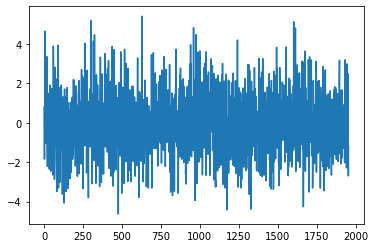

In [8]:
plt.plot(ddd)

In [9]:
ddd.shape

(1955,)

In [8]:
160*12

1920

In [9]:
re =result1

In [10]:
# 保存数据1
np.save(file="SAM500ddd.npy", arr=ddd)

In [11]:
result1 = np.zeros((1955))
i = 0
nu = [f"{x:04d}" for x in range(0,1955)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/air500/CESM_PSL_'+mm+'_.nc')
    plot65 = data.variables['PSL'][0,100,0:160]
    plot65two = data.variables['PSL'][0,100,-180:-1]
    plot40 = data.variables['PSL'][0,200,0:160]
    plot40two = data.variables['PSL'][0,200,-180:-1]
    ave65 = np.nanmean(plot65)
    ave40 = np.nanmean(plot40)
    ave65two = np.nanmean(plot65two)
    ave40two = np.nanmean(plot40two)
    
    std = np.std(result1)
    ave = np.nanmean(result1)
    final65 = (result1 - ave)/std
    
    SAM = ave65 -ave40
    SAMtwo = ave65two -ave40two
    result1[i] = (SAM + SAMtwo)/2 
    #result1[i] = SAMtwo
    i = i + 1

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [11]:
result1 = np.zeros((96))
i = 0
nu = [f"{x:04d}" for x in range(1,97)]
i =0
for mm in nu:
    data=nc.Dataset('/scratch/user/xiliangdiao/firstpaper/SAM/CESM_PSL_'+mm+'_.nc')
    plot65 = data.variables['PSL'][0,100,0:160]
    plot65two = data.variables['PSL'][0,100,-180:-1]
    P65 = np.hstack((plot65two,plot65))
    A = np.nanmean(P65)
    #B = np.nanmean(plot65two)
    result1[i] = A
    i = i + 1

In [12]:
result2 = np.zeros((96))
i = 0
nu = [f"{x:04d}" for x in range(1,97)]
i =0
for mm in nu:
    data=nc.Dataset('/scratch/user/xiliangdiao/firstpaper/SAM/CESM_PSL_'+mm+'_.nc')
    plot40 = data.variables['PSL'][0,200,0:160]
    #plot40 = data.variables['PSL'][0,200,:]
    plot40two = data.variables['PSL'][0,200,-180:-1]
    P40 = np.hstack((plot40two,plot40))
    A = np.nanmean(P40)
    #B = np.nanmean(plot40two)
    #result2[i] = (A + B)/2
    result2[i] = A
    i = i + 1

In [13]:
std = np.std(result1)
ave = np.nanmean(result1)
final65 = (result1 - ave)/std

std = np.std(result2)
ave = np.nanmean(result2)
final40 = (result2 - ave)/std

In [14]:
ddd = final65-final40

In [15]:
# 保存数据2
np.save(file="SAM330-ddd.npy", arr=ddd)